# Opering dataframes with Pandas

In [1]:
import pandas as pd
pay_base = pd.read_excel('base_pagamentos.xlsx')
sell_base = pd.read_excel('base_vendas.xlsx')

# Handling 'base_pagementos'

## Overview

In [2]:
pay_base.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00


In [3]:
pay_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102528 entries, 0 to 102527
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102528 non-null  object        
 1   customer_id                    102528 non-null  object        
 2   order_status                   102528 non-null  object        
 3   order_purchase_timestamp       102528 non-null  datetime64[ns]
 4   order_approved_at              102399 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100730 non-null  datetime64[ns]
 6   order_delivered_customer_date  99500 non-null   datetime64[ns]
 7   order_estimated_delivery_date  102528 non-null  datetime64[ns]
 8   payment_sequential             102528 non-null  int64         
 9   payment_type                   102528 non-null  object        
 10  payment_installments           102528 non-null  int64         
 11  

In [4]:
pay_base.describe()

,payment_sequential,payment_installments,payment_value
count,102528.00000,102528.000000,102528.000000
mean,1.09337,2.854332,154.309690
std,0.71027,2.686302,217.916223
min,1.00000,0.000000,0.000000
25%,1.00000,1.000000,56.860000
50%,1.00000,1.000000,100.000000
75%,1.00000,4.000000,172.080000
max,29.00000,24.000000,13664.080000


<AxesSubplot:>

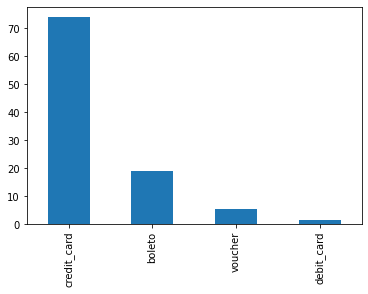

In [5]:
payment_type_count = pay_base.payment_type.value_counts()
payment_type_total = pay_base.payment_type.count()
percentage = round((payment_type_count/payment_type_total)*100,2)
percentage.plot.bar()

## Removing erroneous data

In [6]:
pay_base.order_status.value_counts()

delivered      99507
shipped         1152
unavailable      641
canceled         597
processing       317
invoiced         307
created            5
approved           2
Name: order_status, dtype: int64

### Removing canceled status

In [7]:
pay_base = pay_base.drop(pay_base.loc[pay_base.order_status == 'canceled'].index)

### Removing (0) payment_installments

In [8]:
pay_base = pay_base.drop(pay_base.loc[pay_base.payment_installments == 0].index)

### Removing overlining

<AxesSubplot:>

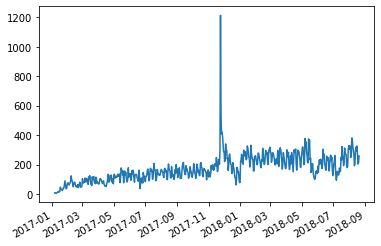

In [9]:
pay_base.order_purchase_timestamp.value_counts().plot()  # Black Friday 24/11

<AxesSubplot:>

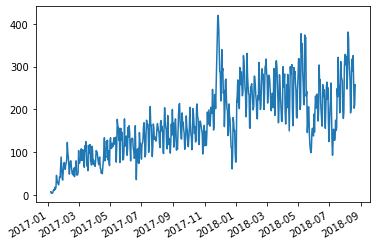

In [10]:
black_friday = pay_base[(pay_base.order_purchase_timestamp >= '2017-11-23') &
                  (pay_base.order_purchase_timestamp <= '2017-11-25')].index

pay_base = pay_base.drop(black_friday)
pay_base.order_purchase_timestamp.value_counts().plot()

## Getting statistics of pay_base

### Popularity of installments

:: credit card ::
Total buys: 73798
Total installements: 257755
Mean installements per buy: 4


<AxesSubplot:ylabel='payment_installments'>

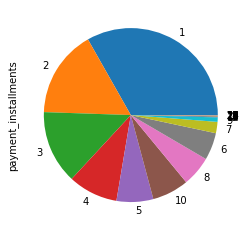

In [11]:
from math import ceil
credit_card = pay_base.loc[pay_base.payment_type == 'credit_card', 'payment_installments']

print(':: credit card ::')
print(f'Total buys: {credit_card.shape[0]}')
print(f'Total installements: {credit_card.sum()}')
print(f'Mean installements per buy: {ceil(credit_card.mean())}')

# Getting as percentage
total = credit_card.count()
instl = credit_card.value_counts()
# print((instl/total) * 100)

credit_card.value_counts().plot.pie()

### Best installment (more profitable)

<AxesSubplot:ylabel='payment_value'>

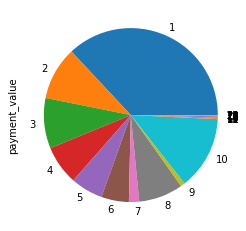

In [12]:
prof = pay_base.groupby(['payment_installments']).sum()
prof.sort_values(by='payment_value', ascending=False)

total_payment = round(prof.payment_value.sum(), 2)
round((prof.payment_value / total_payment) * 100, 5).plot.pie()

# Handling 'base_vendas'

## Overview

In [13]:
sell_base.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08


In [14]:
sell_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111923 entries, 0 to 111922
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111923 non-null  object        
 1   customer_id                    111923 non-null  object        
 2   order_status                   111923 non-null  object        
 3   order_purchase_timestamp       111923 non-null  datetime64[ns]
 4   order_approved_at              111808 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110050 non-null  datetime64[ns]
 6   order_delivered_customer_date  108804 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111923 non-null  datetime64[ns]
 8   order_item_id                  111206 non-null  float64       
 9   product_id                     111206 non-null  object        
 10  seller_id                      111206 non-null  object        
 11  

In [15]:
sell_base.describe()

,order_item_id,price,freight_value,dia_compra,mes_compra,ano_compra
count,111206.000000,111206.000000,111206.000000,111923.000000,111923.000000,111923.000000
mean,1.198020,120.845955,20.032079,15.512853,6.000670,2017.541167
std,0.706445,183.941756,15.847991,8.667442,3.241051,0.498305
min,1.000000,0.850000,0.000000,1.000000,1.000000,2017.000000
25%,1.000000,39.900000,13.080000,8.000000,3.000000,2017.000000
50%,1.000000,74.990000,16.280000,15.000000,6.000000,2018.000000
75%,1.000000,134.990000,21.180000,23.000000,8.000000,2018.000000
max,21.000000,6735.000000,409.680000,31.000000,12.000000,2018.000000


## Removing erroneous data

In [16]:
sell_base = sell_base.drop(sell_base.loc[sell_base.order_status == 'canceled'].index)
sell_base.order_status.value_counts()

delivered      108811
shipped          1171
unavailable       601
processing        355
invoiced          340
created             5
approved            3
Name: order_status, dtype: int64

## Removing null prices

In [17]:
initial = sell_base.price.shape[0]
sell_base.price.dropna()
final = sell_base.price.shape[0]

print(f'{initial-final} Lines removed')

0 Lines removed


## Remove overlining

<AxesSubplot:>

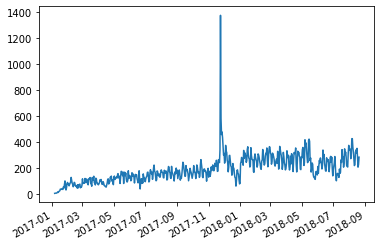

In [18]:
sell_base.order_purchase_timestamp.value_counts().plot()

<AxesSubplot:>

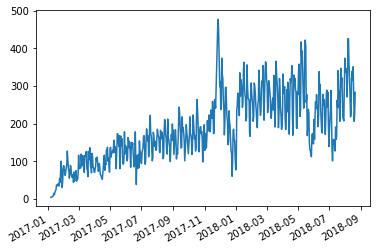

In [19]:
black_friday = sell_base[(sell_base.order_purchase_timestamp >= '2017-11-23') &
                         (sell_base.order_purchase_timestamp <= '2017-11-25')].index
sell_base = sell_base.drop(black_friday)
sell_base.order_purchase_timestamp.value_counts().plot()

## Predicting sales with linear regression

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.linspace(1, 589, 589).reshape(-1, 1)
y = sell_base.order_purchase_timestamp.value_counts().sort_index()

In [154]:
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))

0.5788640445802956


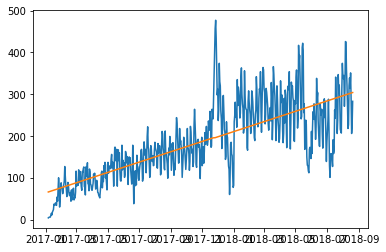

In [162]:
plt.plot(sell_base.order_purchase_timestamp.value_counts().sort_index())
plt.plot(sell_base.order_purchase_timestamp.drop_duplicates().sort_values().to_numpy().reshape(-1, 1), model.predict(X))
plt.show()

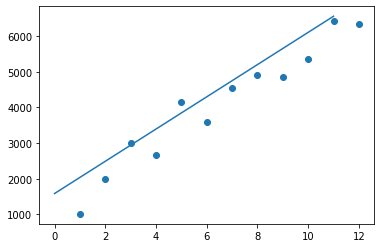

In [199]:

time = sell_base[(sell_base.order_purchase_timestamp >= '2017') &
                         (sell_base.order_purchase_timestamp <= '2018')]
X = np.arange(1, 13, 1).reshape(-1, 1)
y = time.mes_compra.value_counts().sort_index().to_numpy()
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

plt.scatter(X, y)
plt.plot(model.predict(X))